In [1]:
from fetch import fetch_dataframe, SEARCH_URL_REMOTE
import pandas

# Preparations
Read data from local search index and simplify index into one level

In [2]:
data = fetch_dataframe(url=SEARCH_URL_REMOTE).dropna(axis=1, how="all")

Expand the data of the quality kategories:

In [3]:
categories = list(data.quality.iloc[0].keys())
print(
    "The following quality kategories are available: {}".format("; ".join(categories))
)

findability = pandas.DataFrame.from_dict(
    {k: v for k, v in data.quality.map(lambda kats: kats["findability"]).items()}
).T
accessibility = pandas.DataFrame.from_dict(
    {k: v for k, v in data.quality.map(lambda kats: kats["accessibility"]).items()}
).T
interoperabiltiy = pandas.DataFrame.from_dict(
    {k: v for k, v in data.quality.map(lambda kats: kats["interoperabiltiy"]).items()}
).T
reusability = pandas.DataFrame.from_dict(
    {k: v for k, v in data.quality.map(lambda kats: kats["reusability"]).items()}
).T
quality_score = data.quality.map(lambda kats: kats["score"])

The following quality kategories are available: findability; accessibility; interoperabiltiy; reusability; score


# Overall quality score

Looking at the overall quality score we can imidiately see that our values span from 0 to 0.4 instead of 0 to 1. This is a consequence of the fact that two markers, **Accessibility** and **Interoperability** are at the moment mostly filled with default vaules. 

<AxesSubplot: xlabel='Quality index', ylabel='Sorted index'>

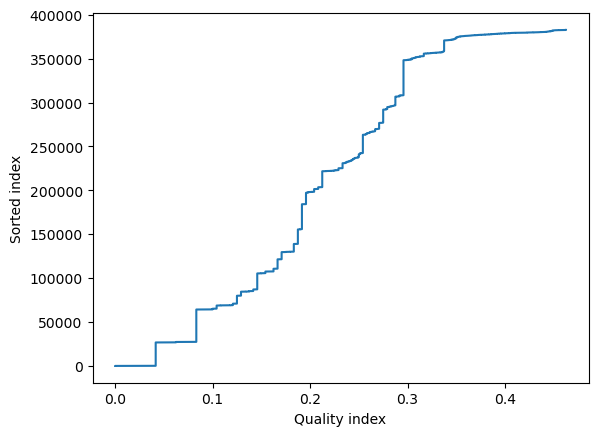

In [4]:
quality_score.sort_values().reset_index(drop=True).reset_index().plot(
    x="quality", y="index", xlabel="Quality index", ylabel="Sorted index", legend=None
)

# Assess Findability

Initialy when we look at the findability we see most

In [5]:
findability.describe()

title  description        space    time  keywords identifier  \
count   382805.0     382805.0       382805  382805  382805.0     382805   
unique       2.0          3.0            5       2     611.0          2   
top          1.0          1.0  BoundingBox    True       1.0      False   
freq    316036.0     255230.0       171747  240133  262519.0     329581   

                score  
count   382805.000000  
unique    1828.000000  
top          0.766667  
freq     73067.000000

We can have a look at the datasets with bad scores in title. We see that most of these have rather short titles.

In [6]:
data.loc[findability.title < 1.0, "title"].reset_index()

source  \
0                  suche-st-geo   
1                  suche-st-geo   
2      ressourceneffizienz-bmuv   
3            aktion-flaeche-uba   
4            aktion-flaeche-uba   
...                         ...   
66764                 elwas-nrw   
66765                 elwas-nrw   
66766                 elwas-nrw   
66767                 elwas-nrw   
66768                 elwas-nrw   

                                                      id  \
0      LVERMGEO-de-datei-download-id-3669,501-160229_...   
1      LVERMGEO-datei-anzeigen-id-142032,501-gmb_2021...   
2      -werkzeuge-ressourceneffizienz-in-der-praxis-g...   
3      https---aktion-flaeche-de-flaechenrechner-neue...   
4                        https---aktion-flaeche-de-leanr   
...                                                  ...   
66764                               messstelle-218415333   
66765                               messstelle-042023324   
66766                               messstelle-086592490   
66767                               messstelle-278511466   
66768                               messstelle-042002898   

                                 title  
0                   Newsletter 01/2016  
1      GMB 2021_Braun_Tabelle geändert  
2            Spritzguss mit Hanffasern  
3       Flächenrechner in neuem Gewand  
4                                LeAn®  
...                                ...  
66764         GW-Messstelle Frauenberg  
66765          GW-Messstelle LINEG_DU4  
66766   Schachtbrunnen KRESS-TEXTIL EI  
66767         GW-Messstelle Berrenrath  
66768         GW-Messstelle LINEG_407H  

[66769 rows x 3 columns]

Just out of interest we can plot to length of the title of our datasets:

<AxesSubplot: xlabel='index', ylabel='Length (chars)'>

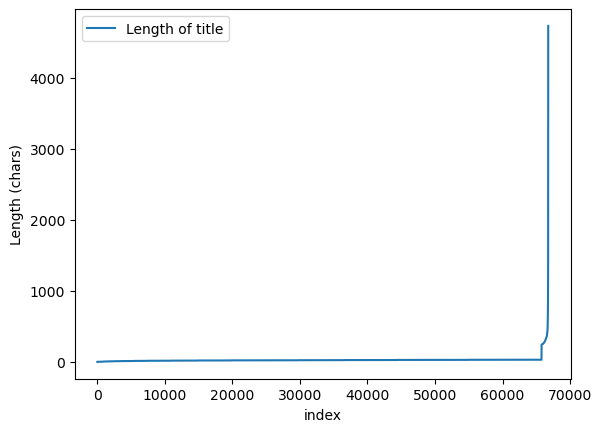

In [7]:
data.loc[findability.title < 1.0, "title"].map(len).sort_values().reset_index().rename(
    {"title": "Length of title"}, axis=1
).plot(ylabel="Length (chars)", xlabel="index")

# Accessibility
Looking at the accessibilty data, only `registration_needed` is non-default at the moment. And this is non-default for only 7 datasets. 

There is a lot to do here.

In [8]:
accessibility.describe()

landing_page download registration_needed     score
count        382805   382805              382805  382805.0
unique            1        1                   2       2.0
top         Unknown    False               False       0.0
freq         382805   382805              382798  382798.0

In [9]:
accessibility.registration_needed.value_counts()

registration_needed
False    382798
True          7
Name: count, dtype: int64

# Interoperability

All the values of this category are default values.

In [10]:
interoperabiltiy.describe()

open_file_format media_type machine_readable_data  \
count            382805     382805                382805   
unique                1          1                     1   
top               False      False                 False   
freq             382805     382805                382805   

       machine_readable_metadata     score  
count                     382805  382805.0  
unique                         1       1.0  
top                        False       0.0  
freq                      382805  382805.0

# Reusability

- Most datasets don't have **contact** or **publisher** information.
- Quite a few datasets are actually "top-tier **free**" licenses.
- Why do we have so many `NoInformation` entries?

In [11]:
reusability.describe()

license_type contact_info publisher_info          score
count               382805       382805         382805  382805.000000
unique                   4            2              2      10.000000
top     UnclearInformation        False          False       0.083333
freq                173860       357312         254112  136856.000000

In [12]:
reusability.license_type.value_counts()

license_type
UnclearInformation         173860
ClearlySpecifiedAndFree    105590
NoInformation              103348
ClearlySpecified                7
Name: count, dtype: int64

In [13]:
reusability[["contact_info", "publisher_info"]].value_counts()

contact_info  publisher_info
False         False             249458
              True              107854
True          True               20839
              False               4654
Name: count, dtype: int64